<a href="https://colab.research.google.com/github/shubham2721/shubham2721/blob/main/Data_Analysis_and_Visualization(Covid_19_and_Vaccines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import math
from google.colab import drive

In [ ]:
pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
od.download('https://drive.google.com/file/d/1R6_aTtYZKOLXXxY8QCxlG2Baca1nKVmP/view?usp=sharing')
od.download('https://drive.google.com/file/d/1Xylc4q6oroQE2eNTw8XuuomP32cR8Fx_/view?usp=sharing')
od.download('https://drive.google.com/file/d/1cpXmbpDaGluJAI9S0EQ7E0u6nymb84Kb/view?usp=sharing')
od.download('https://drive.google.com/file/d/119EjY9Pc4zhPqeeESzAb8cJqdyMvpSD0/view?usp=sharing')

4149627it [00:00, 418073001.48it/s]


Downloaded to  ./country_vaccinations.csv


15890it [00:00, 61653552.78it/s]


Downloaded to  ./population_by_country_2020.csv


5020296it [00:00, 871189391.56it/s]


Downloaded to  ./worldometer_coronavirus_daily_data.csv


18542it [00:00, 5564595.36it/s]

Downloaded to  ./worldometer_coronavirus_summary_data.csv


In [ ]:
daily_df = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')
summary_df = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

In [ ]:
summary_df.sample(5)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
148,Oman,Asia,213784,2303.0,197080,14401,239.0,40928,441.0,1550000.0,296738.0,5223461
138,Myanmar,Asia,143486,3216.0,132279,7991,NaN,2621,59.0,2617696.0,47821.0,54739902
198,Thailand,Asia,149779,988.0,102311,46480,1169.0,2141,14.0,8124896.0,116139.0,69958669
26,Brazil,South America,16392657,459171.0,14811266,1122220,8318.0,76627,2146.0,49076549.0,229408.0,213926682
203,Turkey,Asia,5228322,47134.0,5083099,98089,1454.0,61395,553.0,53478278.0,627979.0,85159401


**strptime function**
1. %d - Represents the day of the month. Example: 01, 02, ..., 31
2. %B - Month's name in full. Example: January, February etc.
3. %Y - Year in four digits. Example: 2018, 2019 etc.
4. %m - month in number. Example: 02, etc.

Here is the link to find more arguments under this fucntions[ https://www.programiz.com/python-programming/datetime/strptime](https://)



In [ ]:
daily_df['date'] = daily_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
daily_df['date']
# we can also convert using this
#daily_df['date'] = pd.to_datetime(daily_df['date'])

0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
103199   2021-05-24
103200   2021-05-25
103201   2021-05-26
103202   2021-05-27
103203   2021-05-28
Name: date, Length: 103204, dtype: datetime64[ns]

In [ ]:
daily_df.dtypes

date                       datetime64[ns]
country                            object
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

##**1. GLOBAL STATISTICS**

In [ ]:
summary_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807
1,Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947
2,Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141
3,Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377
4,Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208


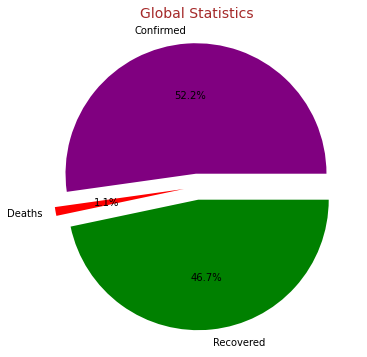

In [ ]:
# based on confirmed, deaths and recovered we will create Global Statitics 
# using matplotplib
plt.figure(figsize = (12,6))
plt.title("Global Statistics", color = 'Brown', size = 14)
myexplode = [0.1,0.1,0.1] # this will seperate every part
mycolor = ['Purple', 'Red', 'Green']
plt.pie([summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
        labels = ['Confirmed', 'Deaths', 'Recovered'], autopct = '%1.1f%%', explode = myexplode, colors = mycolor);

In [ ]:
# using plotly
graph = px.pie(names =['Confirmed', 'Deaths', 'Recovered'],
       values = [summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
       title = '<b> Global Statistics </b>',hover_name = ['Confirmed', 'Deaths', 'Recovered'], 
       hole = 0.6, color = mycolor,
       height = 500,
       width = 700)
graph.update_layout(
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red")


In [ ]:
# using plotly to plot two graphs 
graph = px.pie(names =['Confirmed', 'Deaths', 'Recovered'],
       values = [summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
       title = '<b> Global Statistics </b>',hover_name = ['Confirmed', 'Deaths', 'Recovered'], 
       hole = 0.6, color = mycolor,
       height = 500,
       width = 700)
graph.update_layout(
    updatemenus =[
                   dict(
                       type = "buttons",
                        direction = "right",
                        buttons = list([
                            dict(
                            args = ["type", "pie"],
                            label = "Pie Plot",
                            method = "restyle"
                        ),
                        dict(
                            args = ["type", "bar"],
                            label = "Bar",
                            method = "restyle"
                        )
                        ]),
                   ),
    ]
)
graph.update_traces(textinfo = "label+text+value")
graph.show()

In [ ]:
def add_comma(num):
  out =""
  counter = 0
  for i in num[::-1]: #54321
    counter = counter + 1
    if counter == 4:
      counter = 1
      out = ',' + out
    out = i + out
  return out

In [ ]:
add_comma(str(12312345))

'12,312,345'

map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [ ]:
log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)
scale_vals = list(map(add_comma, scale_vals))

In [ ]:
scale_vals

['1',
 '4',
 '16',
 '64',
 '256',
 '1,024',
 '4,096',
 '16,384',
 '65,536',
 '262,144',
 '1,048,576',
 '4,194,304',
 '16,777,216']

##2. Geo Graphs based on Highest total confirmed Cases

In [ ]:
summary_df['log(Total Confirmed)'] = np.log2(summary_df['total_confirmed'])
summary_df['Total Confirmed'] = summary_df['total_confirmed'].apply(lambda x : add_comma(str(x)))

graph = px.choropleth(summary_df,
                    locations="country",
                    color="log(Total Confirmed)",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    color_continuous_scale='reds',
                    title = '<b>Covid19 Confirmed Cases Around The Globe</b>')
graph.update_layout(title_font_size=22,
                  margin={"r":20, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>",
                                            #range=[np.log(50), np.log(6400)],
                                            titleside="top",
                                            tickmode="array",
                                            tickvals=log_scale_vals,
                                            ticktext=scale_vals
                                        )},
                 )
graph.show()

In [ ]:
# simple way to represent
graph = px.choropleth(summary_df,
                    locations="country",
                    color="total_confirmed",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    title = '<b>Covid19 Confirmed Cases Around The Globe</b>')
graph.update_layout(title_font_size=16,
                  margin={"r":30, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>")}
                      )
graph.show()

##3. POPULATION AROUND GLOBE IN 2020

In [ ]:
pop_df = pd.read_csv('/content/population_by_country_2020.csv')

In [ ]:
pop_df = pop_df.drop(columns = pop_df.loc[:,'Yearly Change':] ,axis = 1)

In [ ]:
pop_df.columns = ['country', 'population']

In [ ]:
graph = px.choropleth(pop_df,
                    locations="country",
                    color="population",
                    locationmode = 'country names',
                    title = '<b>population in 2020 around globe</b>',
                    color_continuous_scale = 'peach')
graph.show()

##4. Total Coronavirus Confirmed Cases Breakdown by Continent and its Country
Tree Map 

In [ ]:
summary_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111"
1,Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947,17.013290,"132,285"
2,Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141,16.968014,"128,198"
3,Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377,13.741151,"13,693"
4,Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208,15.050869,"33,944"


In [ ]:
pip install --upgrade plotly

In [ ]:
fig = px.treemap(summary_df, path =['continent','country'], values="total_confirmed", height = 750,
                 title="<b>Total Confirmed Cases Breakdown by Country</b>")
fig.update_traces(textinfo = "label+text+value")
fig.show()

As we can see that Asia has the highest number of confirmed cases

## 5. Visualise using Country

In [ ]:
daily_df[daily_df['country']== 'India'].head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
43641,2020-02-15,India,3.0,NaN,0.0,0.0,NaN
43642,2020-02-16,India,3.0,0.0,0.0,0.0,NaN
43643,2020-02-17,India,3.0,0.0,0.0,0.0,NaN
43644,2020-02-18,India,3.0,0.0,0.0,0.0,NaN
43645,2020-02-19,India,3.0,0.0,0.0,0.0,NaN


In [ ]:
def plot_country(country):
  #plot 1 (For Cumulative Total Cases)
  graph = px.area(daily_df, x = daily_df[daily_df['country'] == country]['date'],
          y = daily_df[daily_df['country'] == country]['cumulative_total_cases'],
          template='plotly_dark',
          title = f"total cumulative cases in {country}" )
  graph.update_layout(
    title=f"total cumulative cases in {country}",
    xaxis_title="Date Range",
    yaxis_title="total Count of Cases")
  graph.show()
  #plot 2 (Daily New Deaths)
  graph = px.bar(daily_df, x = daily_df[daily_df['country'] == country]['date'],
                  y =daily_df[daily_df['country'] == country]['daily_new_deaths'],
                  template ='plotly_dark',
                  title = f"daily new deaths in {country}" )
  #graph.update_traces(line={'width':2, 'color': 'Red'})
  graph.update_layout(
    xaxis_title="Date Range",
    yaxis_title="total Count of Deaths")
  graph.show()


In [ ]:
# Now we can analyze using plot_country function
plot_country('India')

## 6. Visualize Using Continent

In [ ]:
summary_df.head(1)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111"


In [ ]:
def plot_continent(continent):
  df_continent = summary_df[summary_df['continent'] == continent]
  # plot 1 (TOTAL CONFIRMED CASES)
  graph = px.bar(df_continent, x =df_continent['country'], y =df_continent['total_confirmed'],
                  title = f"<b>Total Confirmed Cases in the {continent} Country wise",
                  template = 'plotly_dark',
                  height = 600, width = 1300)
  graph.update_traces(text = df_continent['total_confirmed'])# for labeling value 
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of total Confirmed cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,)
 
  graph.show()
  #=========================================================================================
  # plot 2 (Total Death Cases)
  graph = px.area(df_continent, x =df_continent['country'], y =df_continent['total_deaths'],
                  title = f"<b>Total Death Cases in the {continent} Country wise",
                  template = 'plotly_dark',
                  height = 600, width = 1300)
  graph.update_traces(text = df_continent['total_deaths'])# for labeling value 
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of total Death cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14)
  graph.show()
  #=========================================================================================
  # plot 3 (Total Recovered Cases)
  graph = go.Figure() 
  graph.add_trace(go.Line(name ='Recovered', x =df_continent['country'], y =np.log2(df_continent['total_recovered'])))
  graph.add_trace(go.Scatter(name ='Serious or critical', x =df_continent['country'], y =np.log2(df_continent['serious_or_critical'])))
  graph.update_traces(text = df_continent['total_recovered'])
  graph.update_layout(title = f"<b>Total Recovered Cases in the {continent} Country wise",
                      title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of Recovered cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,
                      height= 600,
                      width = 1300,
                      template = 'plotly_dark')
  graph.show()
  #=========================================================================================
  # plot 4 (Total Tests and Toal Population)
  graph = px.area(df_continent, x =df_continent['country'], y =np.log2(df_continent['total_tests']),
                  title = f"<b>Total Tests and Toal Population in {continent} Country wise",
                  template = 'plotly_dark',
                  hover_data = [df_continent['total_tests']],
                  height = 600, width = 1300,
                  color=px.Constant("Total Tests"))
  graph.add_scatter(x=df_continent['country'], y = np.log2(df_continent['population']), name = 'Population')
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of Population and Tests',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,
                      legend_title_text ='Category')
 
  graph.show();

In [ ]:
# Now we can analyze using plot_countinent function
plot_continent('Asia')

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
plot_continent('Europe')

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## DASHBOARD

In [ ]:
from plotly.subplots import make_subplots
mycolor = ['orange', 'red', 'lime']
graph = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "scatter" , "colspan" : 2}, None]])
graph.add_trace(
    go.Pie(labels = ['Confirmed', 'Deaths', 'Recovered'], 
           values =[summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()], name = "Total Recovered",
          hole = 0.5, pull = [0,0.6,0]), 
           row =1, col =1)
graph.update_traces(textinfo = 'label+value')
graph.add_trace(
    go.Bar(x = daily_df[daily_df['country'] == 'India']['date'],
                  y =daily_df[daily_df['country'] == 'India']['daily_new_deaths'], name = 'Daily New Deaths'),
           #hole = 0.3, pull = [0,0.6,0]), 
           row =1, col =2)
graph.add_trace(
    go.Scatter(x = summary_df[summary_df['continent'] == 'Asia']['country'],
                  y =summary_df[summary_df['continent'] == 'Asia']['total_deaths'],name = 'Total Deaths'),
           #hole = 0.3, pull = [0,0.6,0]), 
           row =2, col =1)
graph.update_layout(template = 'plotly_dark',
                    legend_title_text ='Categories',
                    title = f"<b>Analyis Of COVID-19")
graph.show()

## VACCINES 

In [ ]:
vacc_df = pd.read_csv('/content/country_vaccinations.csv')

In [ ]:
vacc_df.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1850,Belarus,BLR,2021-01-26,NaN,NaN,NaN,NaN,403.0,NaN,NaN,NaN,43.0,"Sinopharm/Beijing, Sputnik V",World Health Organization,https://covid19.who.int/
12278,Mauritania,MRT,2021-05-26,28770.0,22360.0,6410.0,NaN,673.0,0.62,0.48,0.14,145.0,"Oxford/AstraZeneca, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
13573,Nepal,NPL,2021-02-18,NaN,NaN,NaN,NaN,15236.0,NaN,NaN,NaN,523.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Nepal,https://covid19.mohp.gov.np/covid/englishSitua...
5178,Dominica,DMA,2021-02-19,NaN,NaN,NaN,NaN,205.0,NaN,NaN,NaN,2848.0,Oxford/AstraZeneca,Government of Dominica,https://dominica.gov.dm/updates
3663,Chile,CHL,2021-01-09,10702.0,10702.0,NaN,0.0,293.0,0.06,0.06,NaN,15.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/


Finding out the countries common in both the Data Frames

In [ ]:
print("Countries in the Vaccination Data but not in Summary Data")
print("------------------------------------------------------")
for x in vacc_df['country'].unique():
  if x not in summary_df['country'].unique():
    print(x)

Countries in the Vaccination Data but not in Summary Data
------------------------------------------------------
Antigua and Barbuda
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Brunei
Cape Verde
Cook Islands
Cote d'Ivoire
Czechia
Democratic Republic of Congo
England
Eswatini
Falkland Islands
Guernsey
Guinea-Bissau
Hong Kong
Isle of Man
Jersey
Kosovo
Macao
Nauru
North Macedonia
Northern Cyprus
Northern Ireland
Palestine
Pitcairn
Saint Kitts and Nevis
Saint Vincent and the Grenadines
Sao Tome and Principe
Scotland
Sint Maarten (Dutch part)
Timor
Tonga
Trinidad and Tobago
Turkmenistan
Turks and Caicos Islands
Tuvalu
United Kingdom
United States
Vietnam
Wales
Wallis and Futuna


In [ ]:
summary_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China Hong Kong Sar', 'China Macao Sar', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cote D Ivoire', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [ ]:
# Implement the above
vacc_df['country'] = vacc_df['country'].replace(to_replace = ["Czechia","United States","United Kingdom","Isle of Man","Republic of Ireland","Northern Cyprus"],
                                                      value = ["Czech Republic","USA","UK","Isle Of Man","Ireland","Cyprus"])

In [ ]:
# drop these 4 since they are included in UK 
vacc_df = vacc_df[vacc_df.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [ ]:
vacc_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Fin

In [ ]:
# function to easily agrregate columns
def aggregate(df, agg_col):
    
    data = df.groupby("country")[agg_col].max() # this will group the columns by country and find the maximum value from each country
    data = pd.DataFrame(data) # now data will be created as data frame with two columns country and agg_col
    return data

In [ ]:
# define the columns we want to summarize
cols_to_summarize = ['people_vaccinated', 
                     'people_vaccinated_per_hundred', 
                     'people_fully_vaccinated', 
                     'people_fully_vaccinated_per_hundred', 
                     'total_vaccinations_per_hundred', 
                     'total_vaccinations']
summary = summary_df.set_index('country')
vaccines = vacc_df[['country', 'vaccines']].drop_duplicates().set_index('country')
summary = summary.join(vaccines)
for cols in cols_to_summarize:
  summary = summary.join(aggregate(vacc_df,cols))
summary['percentage_vaccinated'] = summary['total_vaccinations'] / summary['population'] * 100
summary['tested_positive'] = summary['total_confirmed'] / summary['total_tests'] * 100
summary.drop_duplicates()

,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed,vaccines,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,total_vaccinations,percentage_vaccinated,tested_positive
country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",480226.0,1.23,119926.0,0.31,1.54,600152.0,1.511040,15.147345
Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947,17.013290,"132,285","Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",486128.0,16.89,290333.0,10.09,26.98,776461.0,27.007837,18.627492
Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141,16.968014,"128,198",Sputnik V,NaN,NaN,NaN,NaN,0.17,75000.0,0.168293,55.530384
Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377,13.741151,"13,693","Oxford/AstraZeneca, Pfizer/BioNTech",27613.0,35.74,4704.0,6.09,41.83,32317.0,41.765641,7.073013
Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208,15.050869,"33,944",Oxford/AstraZeneca,679034.0,2.07,230181.0,0.70,2.77,909215.0,2.691243,5.955161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis And Futuna Islands,Australia/Oceania,445,7.0,438,0,NaN,40235,633.0,19209.0,1736799.0,11060,8.797662,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.316622
Western Sahara,Africa,10,1.0,8,1,NaN,16,2.0,NaN,NaN,610555,3.321928,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,Asia,6723,1316.0,3375,2032,23.0,221,43.0,62990.0,2071.0,30417585,12.714889,"6,723",Oxford/AstraZeneca,104070.0,0.35,NaN,NaN,0.35,104070.0,0.342138,10.673123


In [ ]:
x = summary.sort_values(by = 'total_confirmed', ascending = False).dropna(subset = ['total_confirmed'])
x.iloc[:5,:4]

,continent,total_confirmed,total_deaths,total_recovered
country,,,,
USA,North America,34022657,608961.0,27767040
India,Asia,27729247,322512.0,25178011
Brazil,South America,16392657,459171.0,14811266
France,Europe,5646897,109290.0,5303607
Turkey,Asia,5228322,47134.0,5083099


In [ ]:
k = True
xaxistitle = ''
yaxistitle = ''
def get_multi_line_title(title, subtitle):
  return f"<b>{title}<br><sub>{subtitle}</sub>"
def draw_graph(df, xcolumns, ycolumns, title, n= None):
  df = df.sort_values(by = ycolumns, ascending = False).dropna(subset = [ycolumns])
  if n is not None:
    df = df.iloc[:n]
  else:
    n= " "
  graph = px.bar(df, x =xcolumns, y= ycolumns, title=title, template = 'plotly_dark', color=ycolumns)
  graph.update_traces(text = df[ycolumns].apply(np.ceil)) 
  if k == True:
    graph.update_layout(xaxis_title = f"Top {n} {xaxistitle}",
                        yaxis_title = f"{yaxistitle}",
                        legend_title = f"{yaxistitle}",
                        coloraxis_showscale = False,)
    graph.show()
  else:
    graph.show()

In [ ]:
# Top 20 countries with number of population vaccinated
title = get_multi_line_title('People Vaccinated','Individuals who received the first dose of the vaccine')
xaxistitle = 'Countries'
yaxistitle = 'Count of Total Vaccination'
draw_graph(summary.reset_index(), 'country', 'total_vaccinations', title, n = 20)

In [ ]:
# Top 20 countries with number of population vaccinated
k == True
title = get_multi_line_title('Percentage Vaccinated','Percentage of the total population that have received the first dose')
xaxistitle = 'Countries'
yaxistitle = 'Percentages(%)'
draw_graph(summary.reset_index(), 'country', 'percentage_vaccinated', title, n = 20)

In [ ]:
# Top 20 countries with number of population vaccinated
k == True
title = get_multi_line_title('Serious or Critical Cases','Number of people who are currently critically ill due to Covid-19')
xaxistitle = 'Countries'
yaxistitle = 'Count of Critical Cases'
draw_graph(summary.reset_index(), 'country', 'serious_or_critical', title, n = 20)

## Death Rates Around Globe

In [ ]:
title = get_multi_line_title("Death Rates", "Percentage of the confirmed cases who have died from Covid-19")
data = summary_df.copy()
data['death_rate'] =  data['total_deaths']*100/data['total_confirmed']
data = data.dropna(subset=['death_rate'])
graph = px.scatter_geo(data,
               locationmode ='country names',
               locations = 'country',
               size = 'death_rate',
               color = 'continent',
               projection = 'satellite')# projection = natural earth
graph.update_layout(title =title)
graph.show()

In [ ]:
title = get_multi_line_title("Percentage Statistics", "Active, Recovered and Deaths in terms of percentage of population")

data = summary.reset_index().dropna(subset=['active_cases', 'total_recovered', 'total_deaths','population'])
data['active_percent'] = data['active_cases']/data['population'] * 100
data['recovered_percent'] = data['total_recovered']/data['population'] * 100
data['deaths_percent'] = data['total_deaths']/data['population'] * 100
data['confirmed_percent'] = data['total_confirmed']/data['population'] * 100
data = data.sort_values('confirmed_percent', ascending=False).drop_duplicates(subset=['country'])



#plotting

fig = go.Figure(data=[
                go.Bar(
                    name="Deaths",
                    x=data['country'], 
                    y=data['deaths_percent'],
                    marker_color='crimson',
                    marker=dict(line=dict(
                                  width=0.1,
                                  color='red'
                                )
                            )
                ),
                go.Bar(
                    name="Active",
                    x=data['country'], 
                    y=data['active_percent'],
                    marker_color='royalblue',
                    marker=dict(
                              line=dict(
                                  width=0.1,
                                  color='blue'
                              )
                        )
                ),
                go.Bar(
                    name="Recovered",
                    x=data['country'], 
                    y=data['recovered_percent'],
                    marker_color='lightseagreen',
                    marker=dict(
                              line=dict(
                                  width=0.1,
                                  color='green'
                              )
                        )
                )

            ])

fig.update_layout(
        title=title,
        xaxis_title="Country",
        yaxis_title="Percentages(%)",
        hovermode="x",
        barmode='stack'
    )

NameError: ignored

In [ ]:
data.dtypes

country                                 object
continent                               object
total_confirmed                          int64
total_deaths                           float64
total_recovered                          int64
active_cases                             int64
serious_or_critical                    float64
total_cases_per_1m_population            int64
total_deaths_per_1m_population         float64
total_tests                            float64
total_tests_per_1m_population          float64
population                               int64
log(Total Confirmed)                   float64
Total Confirmed                         object
vaccines                                object
people_vaccinated                      float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated                float64
people_fully_vaccinated_per_hundred    float64
total_vaccinations_per_hundred         float64
total_vaccinations                     float64
percentage_va

In [ ]:

# choropleth maps for easier visualization
title = get_multi_line_title("Total Confirmed Cases", "Active, Recovered and Deaths in terms of total counts")

fig = px.choropleth(data, locations="country", 
                    locationmode='country names',
                    color='total_confirmed', 
                    hover_name="country", 
                    hover_data=['total_deaths', 'active_cases', 'total_recovered'],
                    title='Global Vaccinations over time',
                    color_continuous_scale="Sunset"
                   )

fig.update_layout(title=title, 
#               coloraxis_showscale=False, 
               title_x=0.5,
               legend_title_text = 'gggg')
fig.show(render = 'png')

## Vaccines In Use

In [ ]:
summary.head(2)

,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed,vaccines,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,total_vaccinations,percentage_vaccinated,tested_positive
country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",480226.0,1.23,119926.0,0.31,1.54,600152.0,1.511040,15.147345
Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947,17.013290,"132,285","Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",486128.0,16.89,290333.0,10.09,26.98,776461.0,27.007837,18.627492


In [ ]:
vacc = summary.groupby('vaccines')['total_vaccinations'].sum()

In [ ]:
vacc_df = pd.DataFrame(vacc)
vacc_df

,total_vaccinations
vaccines,
"Abdala, Soberana02",813867.0
"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",30477703.0
"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",6130509.0
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",661468000.0
"Covaxin, Oxford/AstraZeneca",210468303.0
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing",480824.0
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",378022.0
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",3141577.0
"EpiVacCorona, Sputnik V",28501637.0


In [ ]:
vacc_df = vacc_df.reset_index(drop = False)
vacc_df = vacc_df.sort_values(by = 'total_vaccinations', ascending = False)
vacc_df

,vaccines,total_vaccinations
3,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",661468000.0
12,"Johnson&Johnson, Moderna, Pfizer/BioNTech",294928850.0
9,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",221308680.0
4,"Covaxin, Oxford/AstraZeneca",210468303.0
25,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",107666389.0
15,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",94218239.0
20,"Oxford/AstraZeneca, Pfizer/BioNTech",35511882.0
32,"Oxford/AstraZeneca, Sinovac",30668323.0
1,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",30477703.0
37,"Pfizer/BioNTech, Sinovac",29171543.0


In [ ]:
title = get_multi_line_title('Most Common Vaccines', 'Total vaccines taken over the country')

graph = px.bar(vacc_df, x = 'vaccines', y = 'total_vaccinations', color = 'total_vaccinations', height =800, width = 1125,
               title =title)
graph.update_layout(coloraxis_showscale = False,
                    xaxis_title = 'Types Of Vaccines',
                    yaxis_title = 'Count of Total vaccine')
#graph.update_traces(text = vacc_df['total_vaccinations'])
graph.show()

## Vaccines Preference by country

In [ ]:
data = summary.reset_index().dropna(subset=['vaccines'])
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed,vaccines,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,total_vaccinations,percentage_vaccinated,tested_positive
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",480226.0,1.23,119926.0,0.31,1.54,600152.0,1.511040,15.147345
1,Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947,17.013290,"132,285","Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",486128.0,16.89,290333.0,10.09,26.98,776461.0,27.007837,18.627492
2,Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141,16.968014,"128,198",Sputnik V,NaN,NaN,NaN,NaN,0.17,75000.0,0.168293,55.530384
3,Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377,13.741151,"13,693","Oxford/AstraZeneca, Pfizer/BioNTech",27613.0,35.74,4704.0,6.09,41.83,32317.0,41.765641,7.073013
4,Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208,15.050869,"33,944",Oxford/AstraZeneca,679034.0,2.07,230181.0,0.70,2.77,909215.0,2.691243,5.955161


In [ ]:
# plot popular vaccines around the world
title = get_multi_line_title("Popular Vaccines", "Vaccines being admisitered around the world")
graph = px.choropleth(data, 
                       locationmode = 'country names',
                       locations = 'country',
                       color = 'vaccines',
                      title = title,
                      hover_name = 'country',
                      hover_data = ['total_vaccinations'])
graph.update_layout(title_x=0.5)
graph.show()

## Vaccination over time


In [ ]:
vacc_df.head(1)

,vaccines,total_vaccinations
3,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",661468000.0


In [ ]:
# # unique dates 
# dates = daily_df.date.unique().tolist()
# dates.extend(['2020-12-12', '2020-12-13']) #add 2 dates to improve animation 

# # unique countries 
# countries = daily_df.country.unique().tolist()

# # for easy processing 
# short = vacc_df[['date', 'country', 'total_vaccinations']]

# # values of unqiue (date, country) already in short 
# # i.e we want to make sure we have some data for each, even if it is 0 
# keys= list(zip(short.date.tolist(), short.country.tolist()))
# for date in dates:
#     for country in countries:
#         idx = (date, country)
#         if idx not in keys:
#             if date == min(dates):
#                 # this means there's no entry for {country} on the earliest date 
#                 short = short.append({
#                     "date": date, 
#                     "country": country, 
#                     "total_vaccinations": 0
#                 }, ignore_index=True)
#             else:
#                 # entry for {country} is missing on a date other than the earliest
#                 short = short.append({
#                     "date": date, 
#                     "country": country, 
#                     "total_vaccinations": pd.NA
#                 }, ignore_index=True)
                
# #fill missing values with previous day values (this is OK since it is cumulative)
# short = short.sort_values(['country', 'date'])

# short.total_vaccinations = short.total_vaccinations.fillna(method='ffill')

# # scale the number by log to make the color transitions smoother
# vaccines = short.sort_values('date')
# vaccines['log_scale'] = vaccines['total_vaccinations'].apply(lambda x : math.log2(x+1))


# #plotting
# fig = ex.choropleth(vaccines, locations="country", 
#                     locationmode='country names',
#                     color="log_scale", 
#                     hover_name="country", 
#                     hover_data=['log_scale', "total_vaccinations"],
#                     animation_frame="date",
#                     color_continuous_scale="BuGn",
#                    )

# title = get_multi_line_title("Vaccination Progress", "Number of Vaccines Administered Around the World")
# fig.update_layout(coloraxis={"cmax":25,"cmin":0})
# fig.update_layout(title=title, title_x=0.5, coloraxis_showscale=False)

# fig.show()

In [ ]:
daily_df['month'] = daily_df['date'].dt.strftime("%B")                      

In [ ]:
fig = px.choropleth(daily_df, locations="country", 
                    locationmode='country names',
                    color="active_cases", 
                    animation_frame="month",
                    color_continuous_scale="BuGn",
                   )
fig.show()

In [ ]:
daily_df[['active_cases', 'country']]

,active_cases,country
0,0.0,Afghanistan
1,0.0,Afghanistan
2,0.0,Afghanistan
3,0.0,Afghanistan
4,0.0,Afghanistan
...,...,...
103199,639.0,Zimbabwe
103200,602.0,Zimbabwe
103201,699.0,Zimbabwe
103202,721.0,Zimbabwe


In [ ]:
daily_df.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths', 'month'],
      dtype='object')

In [ ]:
summary_df[summary_df['country']=='India']

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed
93,India,Asia,27729247,322512.0,25178011,2228724,8944.0,19917,232.0,341119909.0,245010.0,1392271886,24.724905,"27,729,247"


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'team': ['A,B,C', 'D,E,F', 'G,H,I'],
                   'position':['Guard', 'Forward', 'Center'],
                   'points': [7, 14, 19]})

In [ ]:
df

,team,position,points
0,"A,B,C",Guard,7
1,"D,E,F",Forward,14
2,"G,H,I",Center,19


In [ ]:
df['team'] = df['team'].str.split(',')

In [ ]:
df

,team,position,points
0,"[A, B, C]",Guard,7
1,"[D, E, F]",Forward,14
2,"[G, H, I]",Center,19


In [ ]:
df = df.explode('team')

In [ ]:
df['team'].value_counts().sum()

9